In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
df=pd.read_csv("tesla.csv")

In [37]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500
...,...,...,...,...,...,...,...
1253,2021-08-09,710.169983,719.030029,705.130005,713.760010,713.760010,14715300
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,709.989990,13432300
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,707.820007,9800600
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,722.250000,17459100


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,183.274022,187.265251,178.941224,183.351102,183.351102,4.441050e+07
std,227.979867,232.845126,222.443374,227.987027,227.987027,3.035737e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,8.297500e+06
25%,54.985001,55.930001,53.929001,54.994501,54.994501,2.478255e+07
50%,66.602002,67.950001,65.445999,66.756000,66.756000,3.498150e+07
75%,165.516998,168.243504,161.504005,163.856503,163.856503,5.211238e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [40]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
293,2017-10-13,71.396004,71.697998,70.736000,71.113998,71.113998,17702500
509,2018-08-23,63.827999,65.463997,63.619999,64.019997,64.019997,25736500
950,2020-05-27,164.171997,165.542007,157.000000,164.046005,164.046005,57747500
1151,2021-03-15,694.090027,713.179993,684.039978,707.940002,707.940002,29335600
1224,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200


In [41]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [42]:
#since there is no missing data no need for cleansing

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

DATA VISUALIZATION


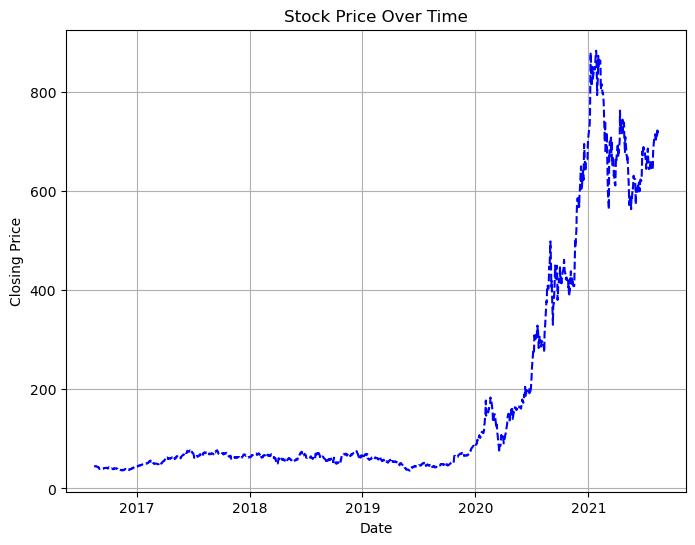

In [54]:
#price vs time chart
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'],linestyle='--',color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

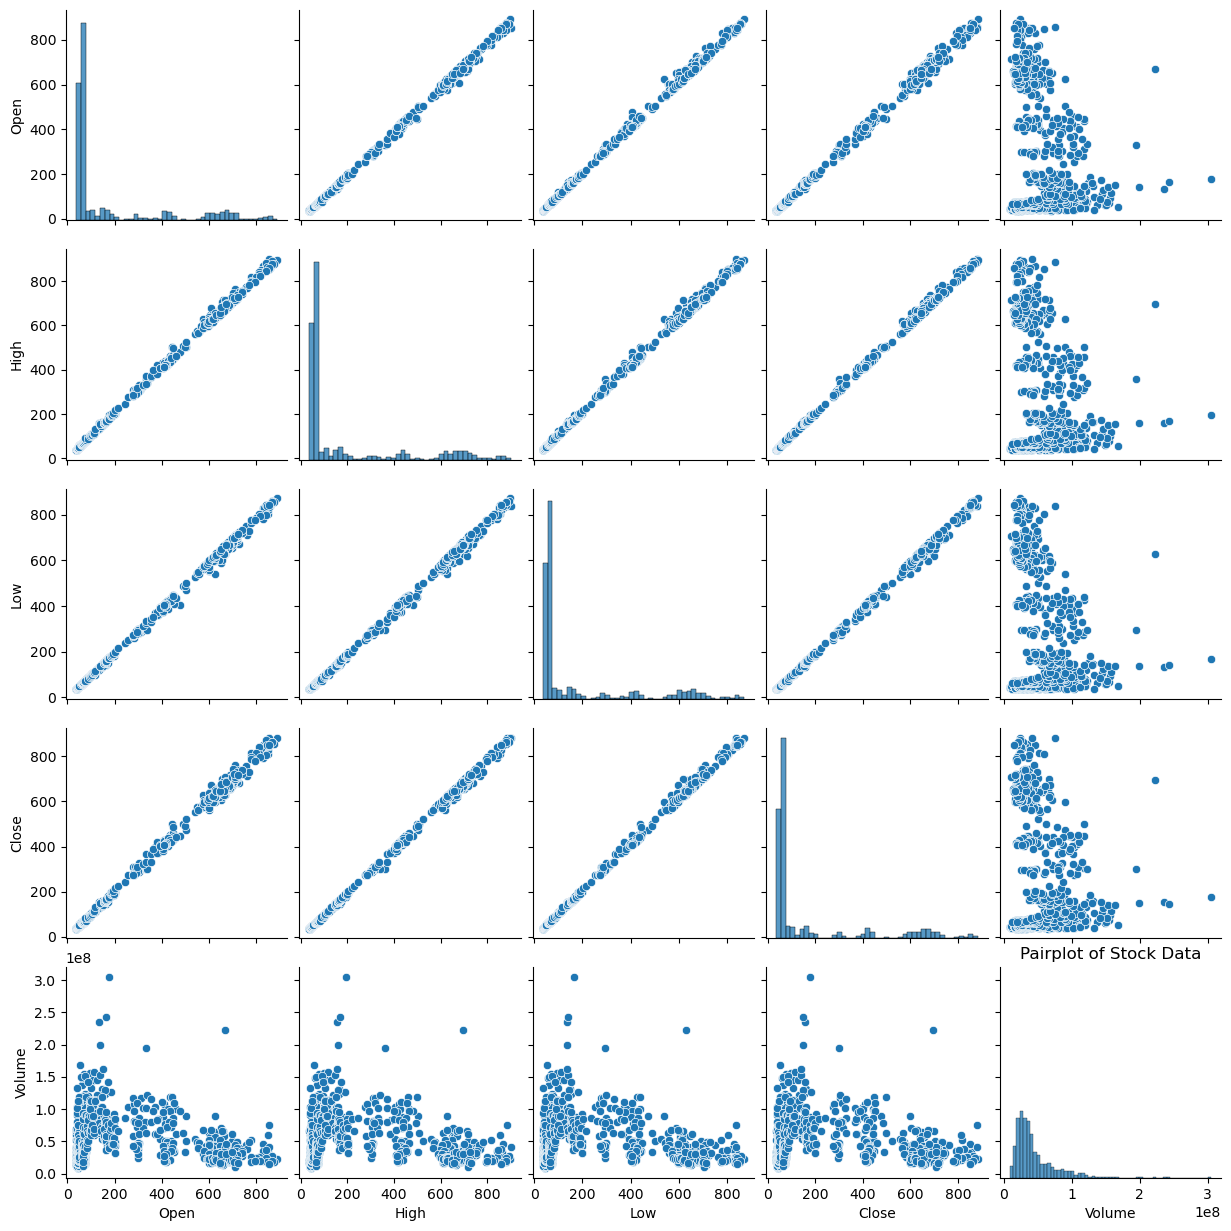

In [65]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Pairplot of Stock Data')
plt.show()

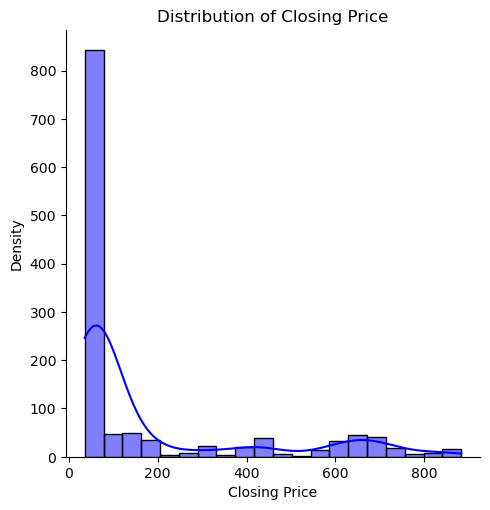

In [56]:
sns.displot(df['Close'], kde=True, color='blue', bins=20)
plt.title('Distribution of Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.show()


In [57]:
# Splitting data into features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

In [58]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Creating and fitting the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
# Predicting on the test set
predictions = xgb_model.predict(X_test)

In [61]:
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 47.93045153607004
R-squared: 0.9990501628965934
